In [52]:
# importing the packages that will be needed
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import seaborn as sns; sns.set()

In [55]:
from sklearn.datasets import load_iris
sk_iris = load_iris() #load the dataset

#check if it's correctly imported
print(sk_iris.keys()) #it is supposed to be a dictionary, let's see the keys
print('\n')
print(sk_iris.data.shape) #1 column is missing... becuase it's the target!
print('\n')
print(sk_iris.feature_names) #name of the features
print('\n')
print(sk_iris.DESCR) #description of the dataset

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


(150, 4)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4

In [62]:
#read into panda and explore the dataset

#np.c_ -> concatenate function used to concat sk_iris['data'] and sk_iris['target'] arrays 
#pandas column argument -> concat sk_iris['feature_names'] list and the target.  
iris = pd.DataFrame(data= np.c_[sk_iris['data'], sk_iris['target']],
                    columns= sk_iris['feature_names'] + ['target'])
iris['target'] = iris['target'].astype('category') #make the iris species feature a categorical column
iris.rename(columns={"target": "species"}, inplace=True)

print('HEAD:')
print(iris.head()) #print the head
print('\n')
print('TAIL:')
print(iris.tail()) #to check out last 10 row of the data set

HEAD:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


TAIL:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9            

In [63]:
#Create a training and test set
from sklearn.model_selection import train_test_split

#split in data/label
iris_class = iris['species'] #label
iris = iris.drop(['species'], axis = 1) #data

#split in 60% for the train and 40% for the test
iris_train, iris_test, class_train, class_test = train_test_split(iris, iris_class, test_size=0.40, random_state=42)

print("Train lenght: " + str(len(iris_train)))
print('5 RANDOM:')
print(iris_train.sample(5))
print('\n')
print("Test lenght: " + str(len(iris_test)))
print('5 RANDOM:')
print(iris_test.sample(5))

Train lenght: 90
5 RANDOM:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
62                6.0               2.2                4.0               1.0
70                5.9               3.2                4.8               1.8
95                5.7               3.0                4.2               1.2
63                6.1               2.9                4.7               1.4
47                4.6               3.2                1.4               0.2


Test lenght: 60
5 RANDOM:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
27                 5.2               3.5                1.5               0.2
18                 5.7               3.8                1.7               0.3
29                 4.7               3.2                1.6               0.2
45                 4.8               3.0                1.4               0.3
128                6.4               2.8                5.6               2.1


In [64]:
#create the tree
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris_train, class_train)

#predict
prediction = clf.predict(iris_test)
print(prediction)

[1. 0. 2. 1. 1. 0. 1. 2. 1. 1. 2. 0. 0. 0. 0. 1. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 0. 0. 0. 1. 0. 0. 2. 1. 0. 0. 0. 2. 1. 1. 0. 0. 1. 1. 2.
 1. 2. 1. 2. 1. 0. 2. 1. 0. 0. 0. 1.]


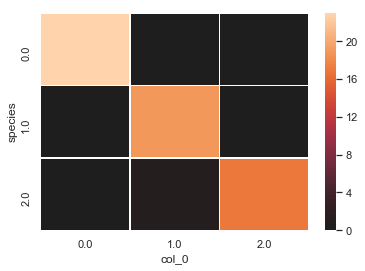

In [70]:
#show the confusion matrix

confusion_matrix = pd.crosstab(class_test, [prediction])
ax = sns.heatmap(confusion_matrix, center=0, linewidths=.5)
matplotlib.pyplot.show()

In [66]:
#performance metrics
from sklearn.metrics import precision_score, recall_score

#precision
#   (The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives)
print('PRECISION:')
print(precision_score(class_test, prediction, average='macro'))
print(precision_score(class_test, prediction, average='micro'))
print(precision_score(class_test, prediction, average='weighted'))
print(precision_score(class_test, prediction, average=None))
print('\n')

#recall
#   (The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives)
print('RECALL:')
print(recall_score(class_test, prediction, average='macro'))
print(recall_score(class_test, prediction, average='micro'))
print(recall_score(class_test, prediction, average='weighted'))
print(recall_score(class_test, prediction, average=None))

PRECISION:
0.9833333333333334
0.9833333333333333
0.9841666666666666
[1.   0.95 1.  ]


RECALL:
0.9814814814814815
0.9833333333333333
0.9833333333333333
[1.         1.         0.94444444]
